### Importing libraries

In [1]:
!pip install wordcloud
!pip install textblob

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
 
import string
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
 
import nltk
nltk.download(['stopwords', 'punkt', 'wordnet', 'omw-1.4',
               'vader_lexicon'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ifeloluwa.adigun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ifeloluwa.adigun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ifeloluwa.adigun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ifeloluwa.adigun\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ifeloluwa.adigun\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Loading of the dataset 
bank_reviews = pd.read_csv('Banks.csv')

In [4]:
#sampling random rows from the dataframe df
bank_reviews.sample(5)

,author,date,location,bank,star,text,like
13756,Amber,7.08.2019,"Poplar Bluff, MO",arvest-bank,1,I called their customer service before I got a...,23.0
9104,David,1.08.2017,"Rio Vista, CA",wells_fargo,1,We applied for a HELOC loan with Wells Fargo B...,2.0
8387,Donald,29.07.2019,"Las Vegas, NV",wells_fargo,5,I've been with Wells Fargo since 2002 and I ha...,NaN
18903,Heather,25.01.2017,"Princeton, TX",credit_one,1,I applied for a Credit One Bank credit card ju...,2.0
15931,lenny,4.08.2019,"Chicago, IL",citibank,1,Terrible call center. 1. Noisy background nois...,13.0


In [5]:
 bank_reviews['star'].unique()

array([5, 4, 3, 1, 2], dtype=int64)

In [6]:
#renaming the unique values of our star values
star = {1: 'Terrible', 2: 'Bad', 3: 'Neutral', 4: 'Good', 5: 'Excellent'}
bank_reviews['star'] = bank_reviews['star'].replace(star)

In [7]:
bank_reviews.sample(5)

,author,date,location,bank,star,text,like
15036,Mellissa,31.10.2017,"Phoenix, AZ",chase_bank,Terrible,I have held personal and business accounts wit...,5.0
13184,Brian,1.07.2021,"Gardner, MA",td_ameritrade,Bad,Do not put your hard earned money into this ba...,19.0
1,Julicia,23.08.2023,"Columbus, GA",merrick_bank,Excellent,Merrick Bank has always been good to me for bu...,NaN
2558,Michael,23.01.2021,"Pineville, MO",us_bank,Terrible,When I opened my checking account with US Bank...,7.0
19037,Truman,4.03.2023,"Surprise, AZ",discover-bank,Terrible,I have been a loyal Discover card account hold...,2.0


In [8]:
#Displaying the column names
print(bank_reviews.keys())

Index(['author', 'date', 'location', 'bank', 'star', 'text', 'like'], dtype='object')


In [9]:
#displaying the first 5 rows of the dataset
bank_reviews.head(5)

,author,date,location,bank,star,text,like
0,Kyle,31.08.2023,"Magnolia, TX",merrick_bank,Excellent,Very easy to use to view statements and make o...,NaN
1,Julicia,23.08.2023,"Columbus, GA",merrick_bank,Excellent,Merrick Bank has always been good to me for bu...,NaN
2,Karen,2.06.2023,"Marrero, LA",merrick_bank,Good,Times are tough for everyone and I have worked...,3.0
3,Brent,29.03.2023,"Moultrie, GA",merrick_bank,Excellent,I can not asked for a better Credit Card Compa...,3.0
4,Sharon,23.11.2022,"Burnham, IL",merrick_bank,Excellent,Updated on 02/10/2023: I was happy to sign for...,3.0


In [10]:
#displaying the last 5 rows of the dataset
bank_reviews.tail(5)

,author,date,location,bank,star,text,like
19266,J.,30.01.2017,"Salem, OR",tcf_bank,Terrible,Paid my 1st payment on time. They sent me a la...,11.0
19267,Destiny,28.01.2017,"Andover, MN",tcf_bank,Terrible,I have banked with TCF for about 4 years now a...,12.0
19268,Sean,25.01.2017,"Bothell, WA",tcf_bank,Terrible,Most inconvenient bank ever. As a business own...,10.0
19269,Edgar,12.01.2017,"Minneapolis, MI",tcf_bank,Terrible,Well I've been with TCF Bank for 3 plus years ...,12.0
19270,edward,2.01.2017,"Suite B, MI",tcf_bank,Terrible,Deposited $800 3 days ago by certified check a...,10.0


In [11]:
bank_reviews.shape

(19271, 7)

In [12]:
bank_reviews.describe(include = 'all')

,author,date,location,bank,star,text,like
count,19269,19271,19271,19271,19271,19181,17769.000000
unique,5699,2418,6286,47,5,19180,NaN
top,John,16.02.2018,"Chicago, IL",bofa,Terrible,I transferred $10K from Chase to PNC Bank last...,NaN
freq,244,73,182,1643,16476,2,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.109291
std,NaN,NaN,NaN,NaN,NaN,NaN,8.091683
min,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,14.000000


#Checking the dataset information
bank_reviews.info()

In [13]:
bank_reviews.isnull().sum()

author         2
date           0
location       0
bank           0
star           0
text          90
like        1502
dtype: int64

In [14]:
bank_reviews.dropna(inplace=True)

In [15]:
bank_reviews.shape

(17683, 7)

In [16]:
# checking for duplicated rows in the dataset
print('The number of duplicated rows in this datset is {}, amounting to about {}% of the entire dataset'
      .format(bank_reviews.duplicated().sum(),(bank_reviews.duplicated().sum()/len(bank_reviews)*100.0).round(2)))

The number of duplicated rows in this datset is 0, amounting to about 0.0% of the entire dataset


In [17]:
bank_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17683 entries, 2 to 19270
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   author    17683 non-null  object 
 1   date      17683 non-null  object 
 2   location  17683 non-null  object 
 3   bank      17683 non-null  object 
 4   star      17683 non-null  object 
 5   text      17683 non-null  object 
 6   like      17683 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.1+ MB


### Data Visualization

<Axes: title={'center': 'Bank reviews based on review star'}, xlabel='star', ylabel='count'>

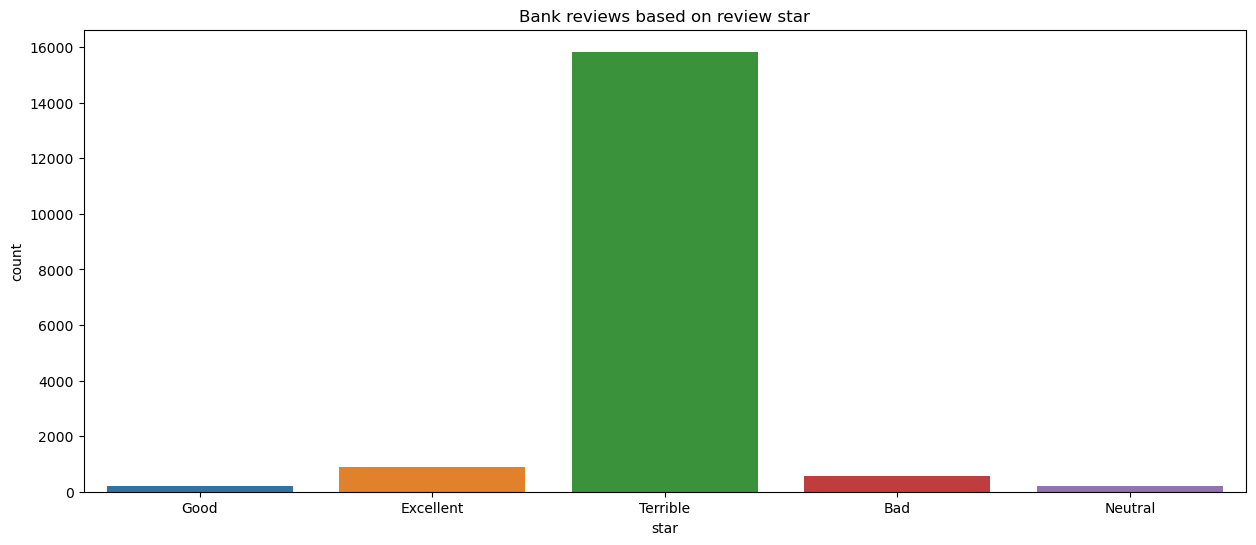

In [18]:
plt.figure(figsize = (15,6))
plt.title("Bank reviews based on review star")
sns.countplot(bank_reviews, x="star")

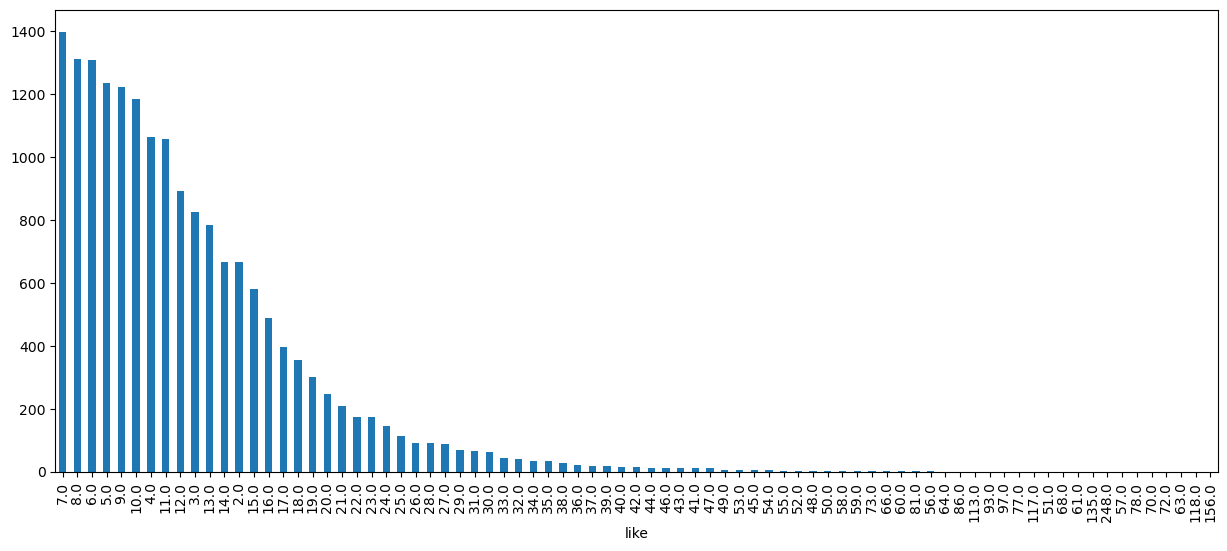

Text(0.5, 1.0, 'Bank review based on likes on comments')

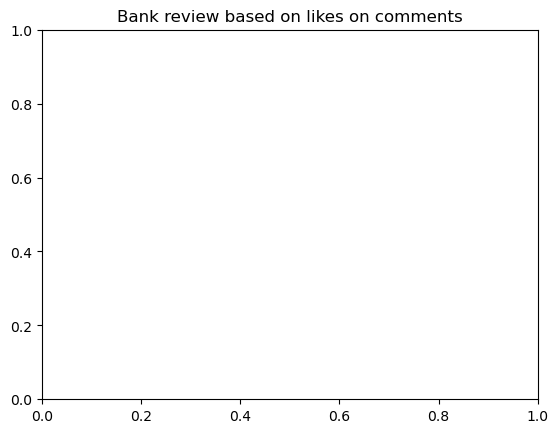

In [19]:
plt.figure(figsize=(15,6))
bank_reviews['like'].value_counts().plot(kind="bar")
plt.show()
plt.title('Bank review based on likes on comments')

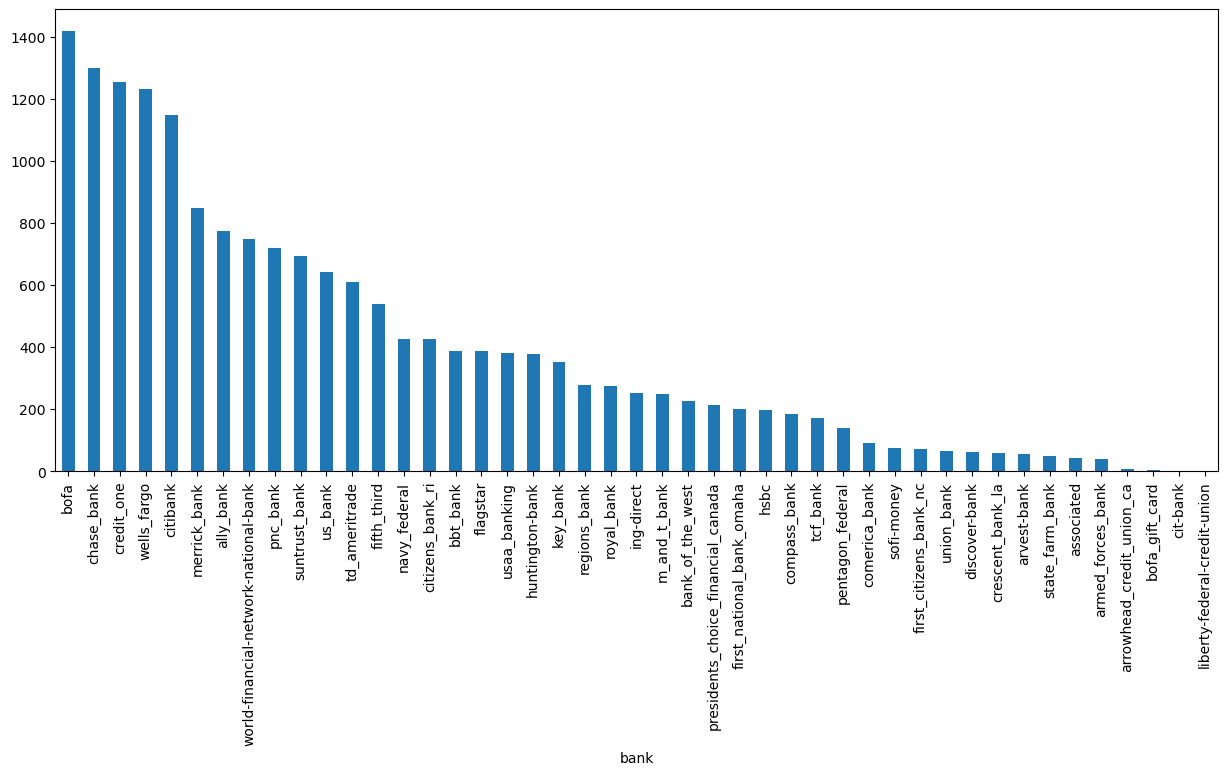

Text(0.5, 1.0, 'Bank review based on banks')

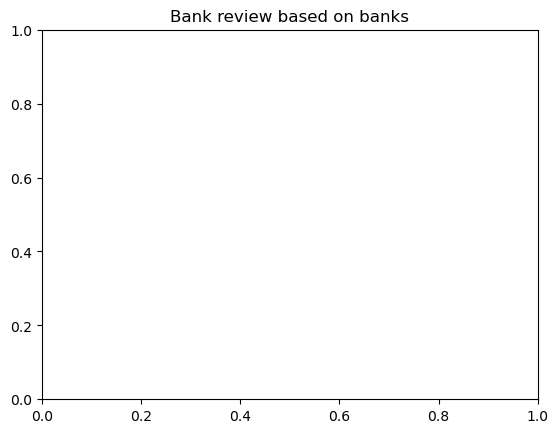

In [20]:
plt.figure(figsize=(15,6))
bank_reviews['bank'].value_counts().plot(kind="bar")
plt.show()
plt.title('Bank review based on banks')

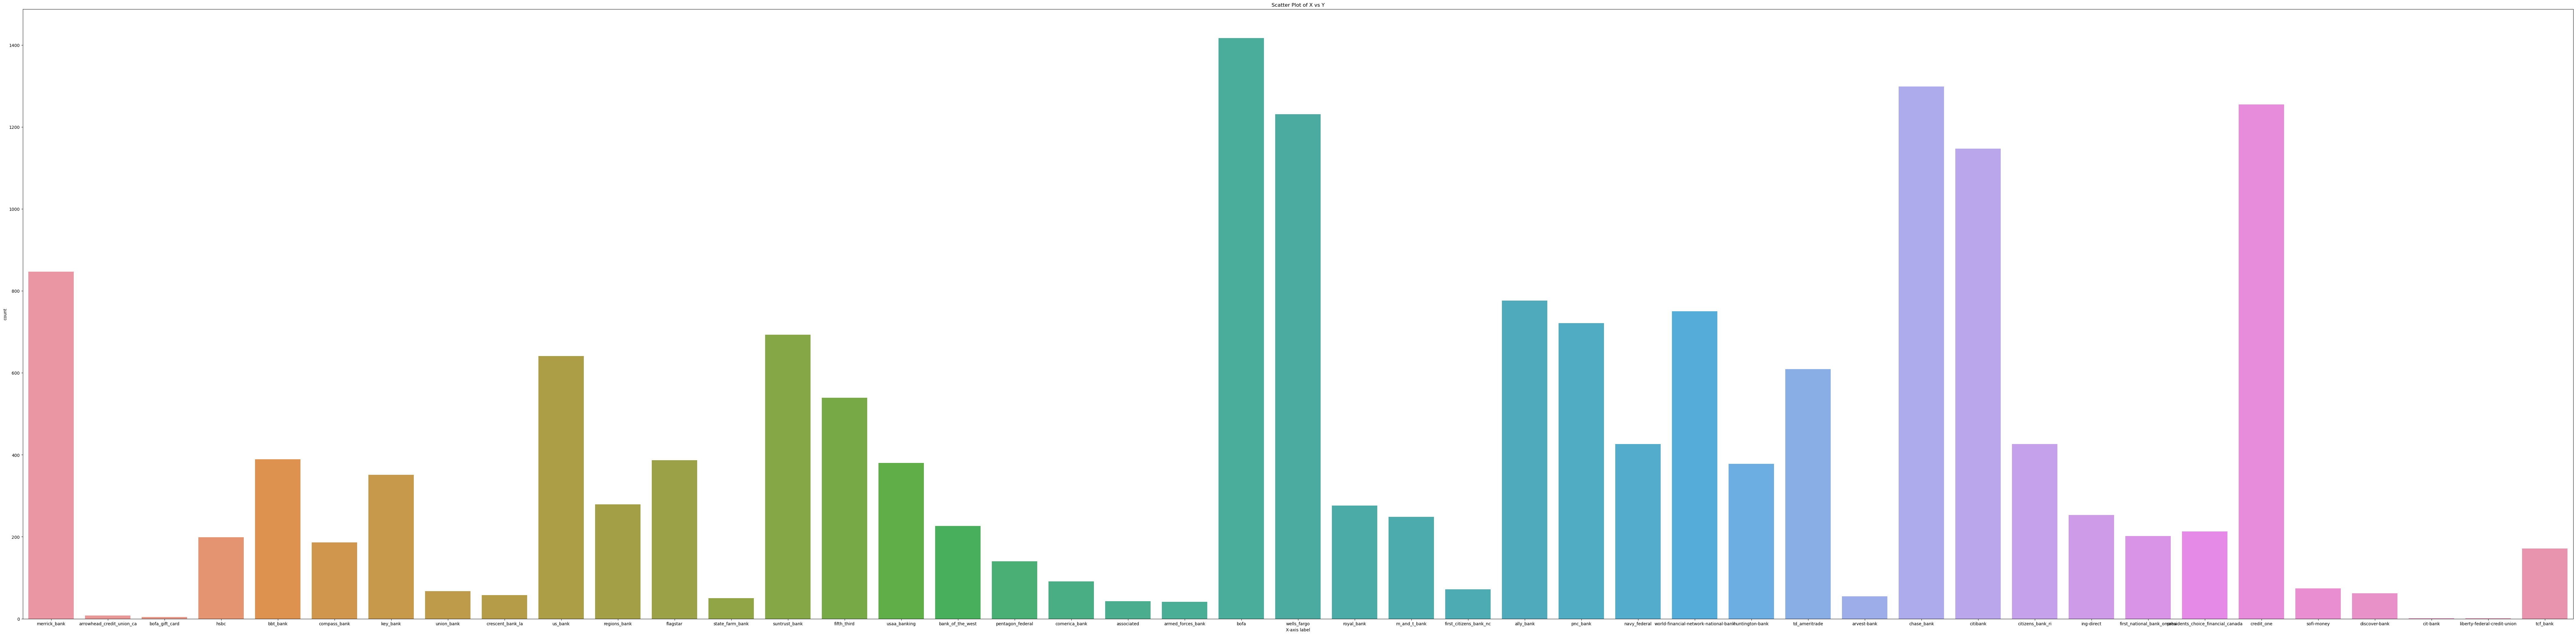

In [21]:
# Scatter plot
plt.figure(figsize=(108,26))
sns.countplot(bank_reviews, x='bank')

plt.title('Scatter Plot of X vs Y')
plt.xlabel('X-axis label')
plt.show()

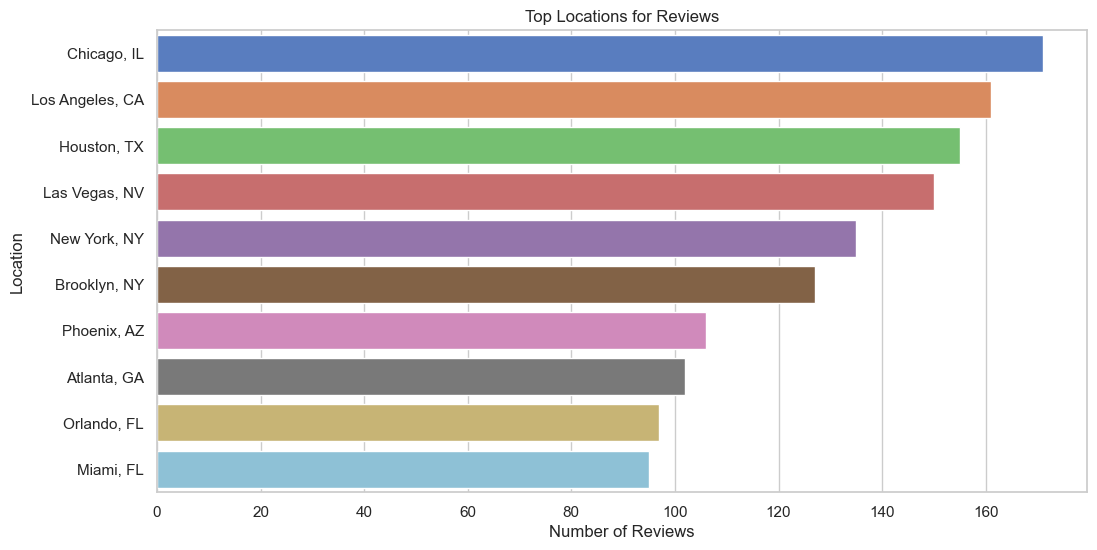

In [22]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
top_locations = bank_reviews["location"].value_counts().head(10)
sns.barplot(x=top_locations, y=top_locations.index, palette="muted")
plt.title("Top Locations for Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Location")

plt.show()

### Text-Mining Pre-processing

In [23]:
#this converts all texts to lower cases
bank_reviews['text']=bank_reviews['text'].str.lower()
bank_reviews['text'].head(5)

2    times are tough for everyone and i have worked...
3    i can not asked for a better credit card compa...
4    updated on 02/10/2023: i was happy to sign for...
5    overall i enjoy the card and use it over most ...
6    what started out as a not so good experience t...
Name: text, dtype: object

In [24]:
#cleaning and removing stopwords
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
bank_reviews['text'] = bank_reviews['text'].apply(lambda text: cleaning_stopwords(text))
bank_reviews['text'].head(5) 


2    times tough everyone worked hard get credit re...
3    asked better credit card company, merrick bank...
4    updated 02/10/2023: happy sign new credit card...
5    overall enjoy card use cards, husband one happ...
6    started good experience turned excellent. 4 tr...
Name: text, dtype: object

In [25]:
#removing punctuation marks from textual data. 
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
bank_reviews['text']= bank_reviews['text'].apply(lambda x: cleaning_punctuations(x))
bank_reviews['text'].head()

2    times tough everyone worked hard get credit re...
3    asked better credit card company merrick bank ...
4    updated 02102023 happy sign new credit card me...
5    overall enjoy card use cards husband one happy...
6    started good experience turned excellent 4 tri...
Name: text, dtype: object

In [26]:
#Removing repeated words 
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
bank_reviews['text'] = bank_reviews['text'].apply(lambda x: cleaning_repeating_char(x))
bank_reviews['text'].head(10)

2      times tough everyone worked hard get credit re...
3      asked better credit card company merrick bank ...
4      updated 0102023 happy sign new credit card mer...
5      overall enjoy card use cards husband one happy...
6      started good experience turned excellent 4 tri...
85     credit card far large easiest card manage got ...
115    unorganized unprofessional bad communicating t...
117    make frequent payments additional fees always ...
128    company fraudulently made charge tried make ad...
133    never received limit increase despite perfect ...
Name: text, dtype: object

In [27]:
#cleaning URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
bank_reviews['text'] = bank_reviews['text'].apply(lambda x: cleaning_URLs(x))
bank_reviews['text'].head()

2    times tough everyone worked hard get credit re...
3    asked better credit card company merrick bank ...
4    updated 0102023 happy sign new credit card mer...
5    overall enjoy card use cards husband one happy...
6    started good experience turned excellent 4 tri...
Name: text, dtype: object

In [28]:
# remove numerical number
def cleaning_numbers(data):
    return re.sub('[0-9]+', ' ', data)
bank_reviews['text'] = bank_reviews['text'].apply(lambda x: cleaning_numbers(x))
bank_reviews['text'].head()


2    times tough everyone worked hard get credit re...
3    asked better credit card company merrick bank ...
4    updated   happy sign new credit card merrick c...
5    overall enjoy card use cards husband one happy...
6    started good experience turned excellent   tri...
Name: text, dtype: object

In [29]:
#representing the text in a structured way
def transform_text(text):
    return ' '.join([word for word in text.split() if len(word) > 2])
bank_reviews['text'] = bank_reviews['text'].apply(lambda x: transform_text(x))
bank_reviews['text'].head() 


2    times tough everyone worked hard get credit re...
3    asked better credit card company merrick bank ...
4    updated happy sign new credit card merrick con...
5    overall enjoy card use cards husband one happy...
6    started good experience turned excellent tries...
Name: text, dtype: object

In [30]:
# Function which directly tokenize the text data
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
bank_reviews['text']=bank_reviews['text'].apply(tt.tokenize)
bank_reviews['text'].head()

2    [times, tough, everyone, worked, hard, get, cr...
3    [asked, better, credit, card, company, merrick...
4    [updated, happy, sign, new, credit, card, merr...
5    [overall, enjoy, card, use, cards, husband, on...
6    [started, good, experience, turned, excellent,...
Name: text, dtype: object

In [31]:
# stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
bank_reviews['text']= bank_reviews['text'].apply(lambda x: stemming_on_text(x))
bank_reviews['text'].head()

2    [times, tough, everyone, worked, hard, get, cr...
3    [asked, better, credit, card, company, merrick...
4    [updated, happy, sign, new, credit, card, merr...
5    [overall, enjoy, card, use, cards, husband, on...
6    [started, good, experience, turned, excellent,...
Name: text, dtype: object

In [32]:
#lemmatization
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
bank_reviews['text'] = bank_reviews['text'].apply(lambda x: lemmatizer_on_text(x))
bank_reviews['text'].head()


2    [times, tough, everyone, worked, hard, get, cr...
3    [asked, better, credit, card, company, merrick...
4    [updated, happy, sign, new, credit, card, merr...
5    [overall, enjoy, card, use, cards, husband, on...
6    [started, good, experience, turned, excellent,...
Name: text, dtype: object

<Axes: xlabel='star', ylabel='count'>

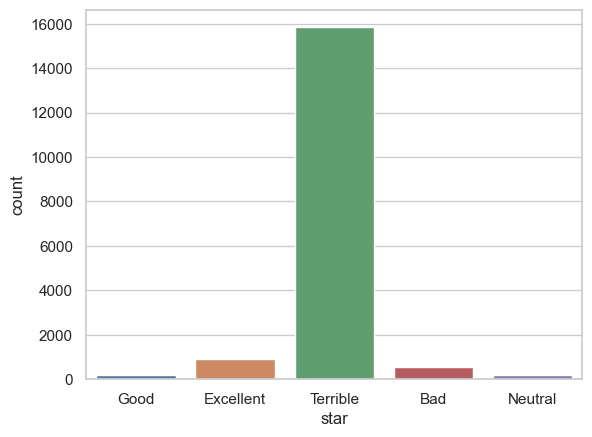

In [33]:
_5star_review = bank_reviews[bank_reviews['star'] == 'Excellent']
_4star_review = bank_reviews[bank_reviews['star'] == 'Good']
_3star_review = bank_reviews[bank_reviews['star'] == 'Neutral']
_2star_review  = bank_reviews[bank_reviews['star'] == 'Bad']
_1star_review = bank_reviews[bank_reviews['star'] == 'Terrible']

# graphical representation of sentiment value counts using the countplot from the seasonborn library
sns.countplot(data=bank_reviews, x='star')

In [34]:

# show the value counts
bank_reviews['star'].value_counts()

star
Terrible     15839
Excellent      889
Bad            556
Good           209
Neutral        190
Name: count, dtype: int64

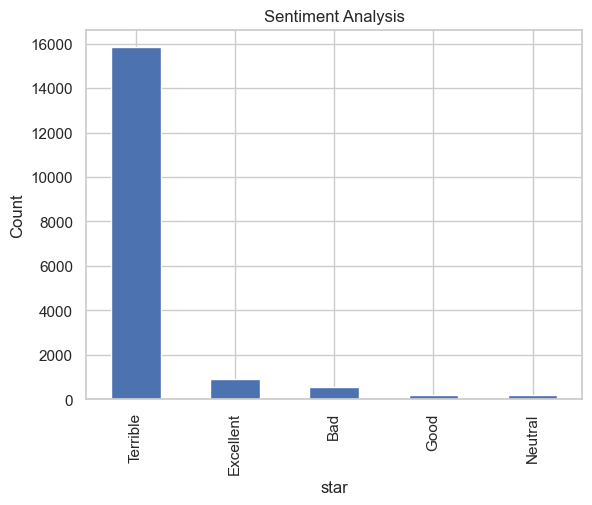

In [35]:

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('star')
plt.ylabel('Count')
bank_reviews['star'].value_counts().plot(kind='bar')
plt.show()


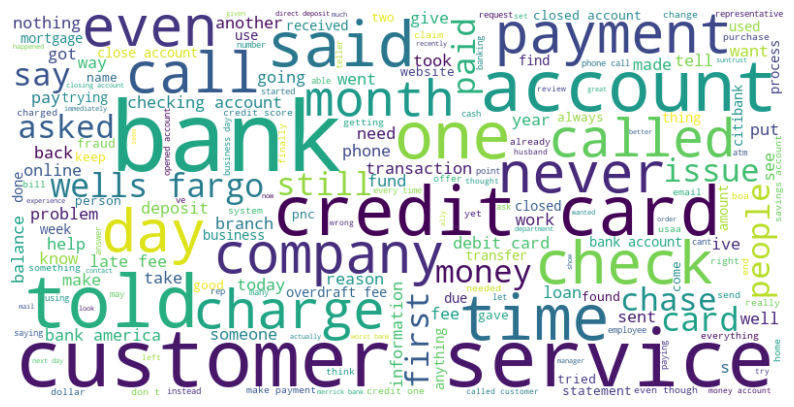

In [36]:
all_reviews = " ".join(" ".join(sent) for sent in bank_reviews['text'])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white',max_font_size=100).generate(all_reviews)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

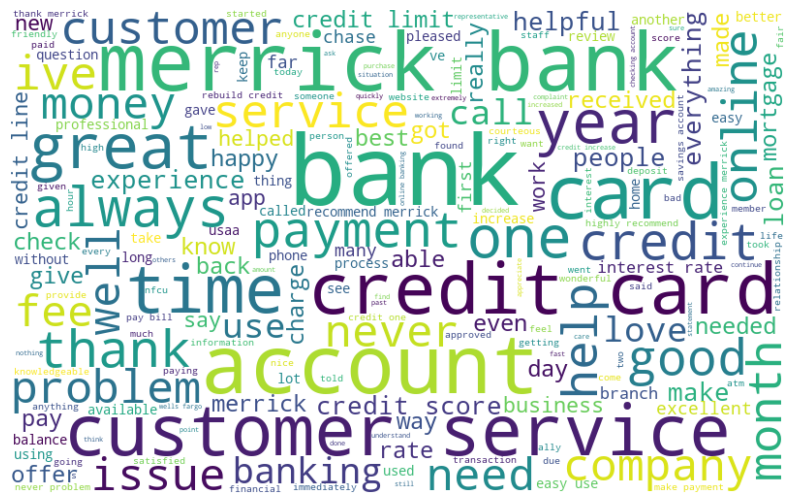

In [37]:
# Visualizing all 5 star reviews              
all_5star_reviews = " ".join(" ".join(sent) for sent in _5star_review['text'])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, background_color='white', max_font_size=100).generate(all_5star_reviews)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

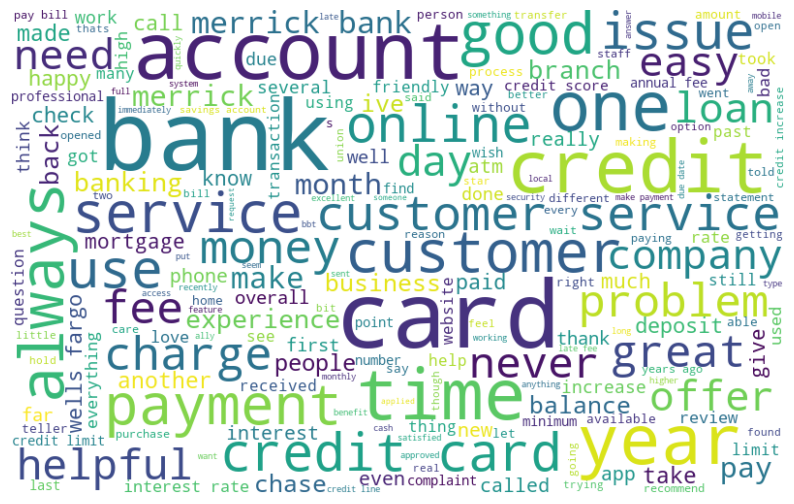

In [38]:
# Visualizing all 4 star reviews              
all_4star_reviews = " ".join(" ".join(sent) for sent in _4star_review['text'])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, background_color='white', max_font_size=100).generate(all_4star_reviews)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

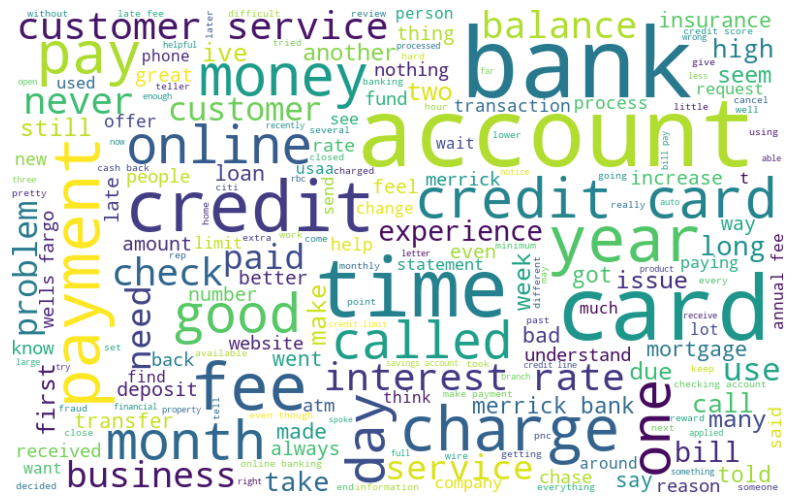

In [39]:
# Visualizing all 3 star reviews              
all_3star_reviews = " ".join(" ".join(sent) for sent in _3star_review['text'])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, background_color='white', max_font_size=100).generate(all_3star_reviews)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

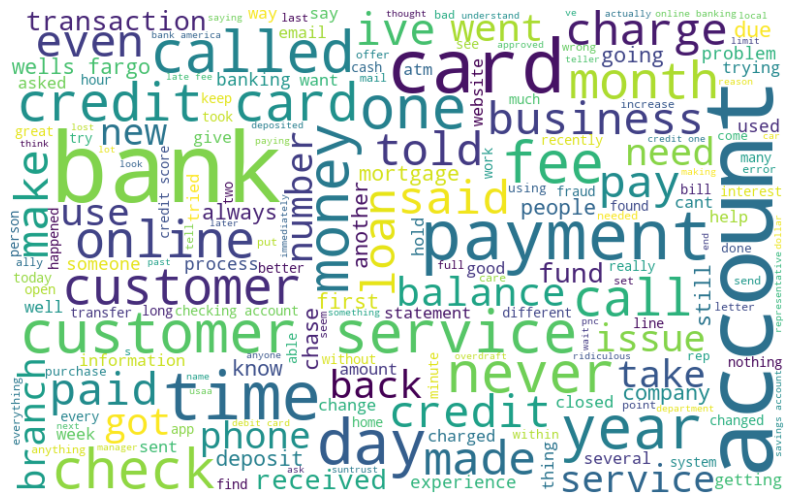

In [40]:
# Visualizing all 2 star reviews              
all_2star_reviews = " ".join(" ".join(sent) for sent in _2star_review['text'])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, background_color='white', max_font_size=100).generate(all_2star_reviews)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

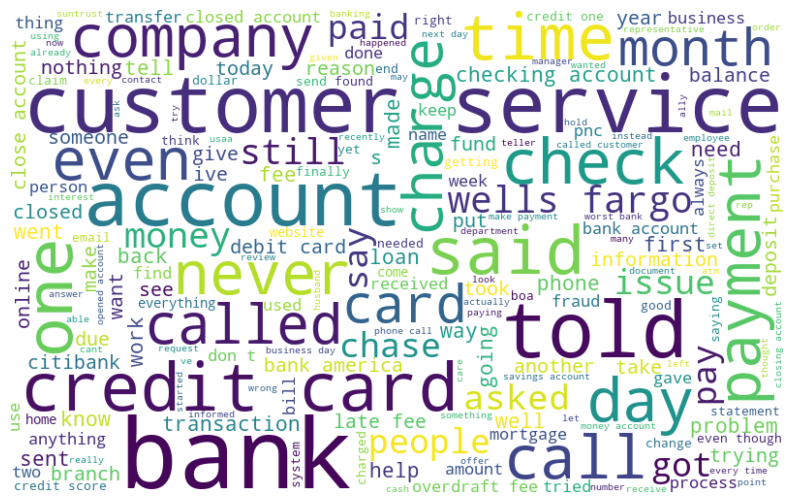

In [41]:
# Visualizing all 1 star reviews              
all_1star_reviews = " ".join(" ".join(sent) for sent in _1star_review['text'])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, background_color='white', max_font_size=100).generate(all_1star_reviews)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:

# Get the percentage of 5 star reviews
print("Excellent",round((_5star_review.shape[0]/bank_reviews.shape[0])*100,1),"%")
# Get the percentage of 4 star reviews
print("Good",round((_4star_review.shape[0]/bank_reviews.shape[0])*100,1),"%")
# Get the percentage of 3 star reviews
print("Neutral",round((_3star_review.shape[0]/bank_reviews.shape[0])*100,1),"%")
# Get the percentage of 2 star reviews
print("Bad",round((_2star_review.shape[0]/bank_reviews.shape[0])*100,1),"%")
# Get the percentage of 1 star reviews
print("Terrible",round((_1star_review.shape[0]/bank_reviews.shape[0])*100,1),"%")



Excellent 5.0 %
Good 1.2 %
Neutral 1.1 %
Bad 3.1 %
Terrible 89.6 %


In [43]:
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(words)
    return text
bank_reviews['preprocessed_text'] = bank_reviews['text'].astype(str).apply(preprocess_text)


In [44]:
bank_reviews['preprocessed_text'] = bank_reviews['text'].astype(str).apply(preprocess_text)


In [45]:
bank_reviews[['star','text', 'preprocessed_text']].head()

,star,text,preprocessed_text
2,Good,"[times, tough, everyone, worked, hard, get, cr...",time tough everyone worked hard get credit res...
3,Excellent,"[asked, better, credit, card, company, merrick...",asked better credit card company merrick bank ...
4,Excellent,"[updated, happy, sign, new, credit, card, merr...",updated happy sign new credit card merrick con...
5,Good,"[overall, enjoy, card, use, cards, husband, on...",overall enjoy card use card husband one happy ...
6,Excellent,"[started, good, experience, turned, excellent,...",started good experience turned excellent try g...


In [46]:
#### VADER's Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    return sia.polarity_scores(text)['compound']

bank_reviews['vader_sentiment'] = bank_reviews['preprocessed_text'].apply(get_vader_sentiment)

bank_reviews['vader_sentiment_category'] = bank_reviews['vader_sentiment'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))


In [47]:
print(bank_reviews[['text', 'preprocessed_text', 'vader_sentiment', 'vader_sentiment_category']].head(10))


                                                  text  \
2    [times, tough, everyone, worked, hard, get, cr...   
3    [asked, better, credit, card, company, merrick...   
4    [updated, happy, sign, new, credit, card, merr...   
5    [overall, enjoy, card, use, cards, husband, on...   
6    [started, good, experience, turned, excellent,...   
85   [credit, card, far, large, easiest, card, mana...   
115  [unorganized, unprofessional, bad, communicati...   
117  [make, frequent, payments, additional, fees, a...   
128  [company, fraudulently, made, charge, tried, m...   
133  [never, received, limit, increase, despite, pe...   

                                     preprocessed_text  vader_sentiment  \
2    time tough everyone worked hard get credit res...           0.9638   
3    asked better credit card company merrick bank ...           0.9881   
4    updated happy sign new credit card merrick con...           0.9504   
5    overall enjoy card use card husband one happy ...       

In [48]:
sentiment_distribution = bank_reviews['vader_sentiment'].value_counts(normalize=True) * 100
sentiment_distribution

vader_sentiment
 0.0000    1.883165
 0.3818    0.831307
-0.2960    0.757790
 0.2960    0.706894
 0.0772    0.701238
             ...   
-0.7755    0.005655
 0.6080    0.005655
-0.9627    0.005655
 0.1930    0.005655
-0.7721    0.005655
Name: proportion, Length: 3778, dtype: float64

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(bank_reviews['text'].map(' '.join))
X.shape


(17683, 19434)

In [50]:
from sklearn.model_selection import train_test_split
y = bank_reviews['star']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2, random_state=0)
print('Training Data :', X_train.shape)
print('Training Data :',X_test.shape)



Training Data : (14146, 19434)
Training Data : (3537, 19434)


<Axes: xlabel='star', ylabel='count'>

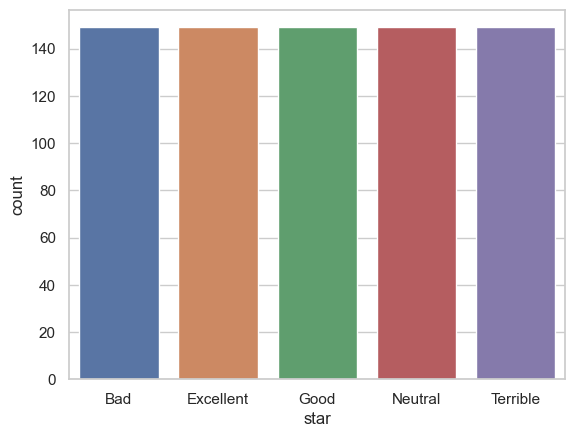

In [51]:
# handling imbalance using the RandomUndersampler 
from imblearn.under_sampling import RandomUnderSampler
resampler = RandomUnderSampler(random_state=0)
X_train_undersampled,y_train_undersampled = resampler.fit_resample(X_train,y_train)
sns.countplot(x=y_train_undersampled)


In [52]:
# training model using the naive bayes model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_undersampled, y_train_undersampled)


MultinomialNB()

In [53]:
y_pred = model.predict(X_test)
y_pred


array(['Terrible', 'Terrible', 'Terrible', ..., 'Bad', 'Terrible', 'Bad'],
      dtype='<U9')

In [54]:
y_pred = model.predict(X_test)
# computing the accuracy and making the confusion matrix
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm,'\n\n')
print('--------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n",)
print(result)

accuracy:0.63


Confusion matrix:
[[  40    7    1   16   45]
 [  31   89   14   21   25]
 [   8    9    4   16    8]
 [  15    0    2   12   12]
 [ 865   17   19  163 2098]] 


--------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

         Bad       0.04      0.37      0.07       109
   Excellent       0.73      0.49      0.59       180
        Good       0.10      0.09      0.09        45
     Neutral       0.05      0.29      0.09        41
    Terrible       0.96      0.66      0.78      3162

    accuracy                           0.63      3537
   macro avg       0.38      0.38      0.33      3537
weighted avg       0.90      0.63      0.74      3537



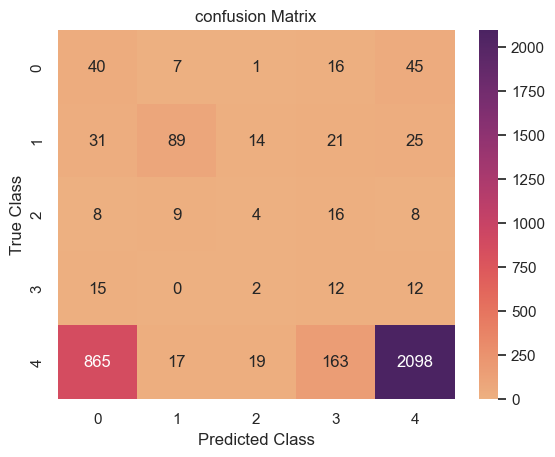

In [55]:

ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt = 'd')
plt.title("confusion Matrix", fontsize = 12)
plt.xlabel("Predicted Class", fontsize = 12)
plt.ylabel("True Class", fontsize = 12)
plt.show()
